In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DATA_FILE='./Data_Input/data.CSV'
df_raw=pd.read_csv(DATA_FILE,encoding='gbk')
df_r=pd.read_csv('./Data_Input/r.csv',encoding='gbk')
print(len(df_r),len(df_raw))
df_raw.insert(0,'r',df_r['涨跌幅(%)'])
df_all=df_raw.iloc[:,0:7].dropna(axis=0)
df_all.tail()

475748 475748


,r,代码,简称,日期,收盘价(元),总市值(元),市净率
475741,-13.8320,688388.SH,嘉元科技,2019-09-30,49.65,1.146299e+10,16.2981
475742,-10.9366,688388.SH,嘉元科技,2019-10-31,44.22,1.020934e+10,14.5156
475743,-5.9023,688388.SH,嘉元科技,2019-11-29,41.61,9.606750e+09,13.6589
475744,36.1932,688388.SH,嘉元科技,2019-12-31,56.67,1.308374e+10,18.6024
475746,0.4896,688389.SH,普门科技,2019-12-31,16.42,6.932524e+09,10.3719


In [2]:
from WindPy import *
w.start()

error,df_rm=w.wsd("881001.WI", "pct_chg", "2000-01-01", "2019-12-31", "Period=M;Fill=Previous;PriceAdj=F", usedf=True)
df_rm.dropna()
df_rm.columns=['rm']

df_rf=pd.read_csv('./Data_Input/rf.csv',encoding='utf-8',index_col=0)
df_rf.columns=['rf']
df_rf.dropna(inplace=True)
df_rf.index=df_rm.index
df_rmrf=pd.concat([df_rm,df_rf],axis=1,join_axes=[df_rm.index]).iloc[12:]
df_rmrf.index=pd.DatetimeIndex(df_rmrf.index)
df_rmrf.head()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


,rm,rf
2001-01-19,-1.005323,2.25
2001-02-28,-5.960868,2.25
2001-03-30,7.650775,2.25
2001-04-30,-0.458969,2.25
2001-05-31,3.748442,2.25


In [3]:
group=df_all.iloc[:,0:5].groupby('代码').size()
print('总股票数量：',len(group))
df_size=pd.DataFrame(group)
np_size=np.array(df_size)
need_stk=[]
for i in range(len(df_size)):
    if np_size[i]==240:
        need_stk.append(df_size.index[i])
print('除去有缺失数据的股票数量:',len(need_stk))


总股票数量： 3731
除去有缺失数据的股票数量: 747


In [218]:
np_need=[]
np_all=np.array(df_all)
for line in enumerate(np_all):
    if line[0]%100000==0:
        print('\r get',line[0])
    if str(line[1][1]) in need_stk:
        np_need.append(line[1])
df_need=pd.DataFrame(np_need,columns=['r','code','name','date','close','market_value','PB'])
df_need['BP']=1/df_need['PB']
df_need['date']=pd.to_datetime(df_need['date'])
df_need.set_index('date',inplace=True)

# 添加动量数据
df_need['MOM']=(df_need['close'].shift(1)/df_need['close'].shift(12)-1)
df_need.tail(10)

 get 0
 get 100000
 get 200000
 get 300000
 get 400000


,r,code,name,close,market_value,PB,BP,MOM
date,,,,,,,,
2019-03-29,12.2693,601607.SH,上海医药,20.2012,5.877441e+10,1.5065,0.663790,-0.241612
2019-04-30,-4.8356,601607.SH,上海医药,19.2244,5.593232e+10,1.4337,0.697496,-0.101570
2019-05-31,-6.5041,601607.SH,上海医药,17.9740,5.229444e+10,1.3404,0.746046,-0.245712
2019-06-28,-1.3587,601607.SH,上海医药,17.7298,5.158392e+10,1.3222,0.756315,-0.218348
2019-07-31,2.4263,601607.SH,上海医药,18.1600,5.161234e+10,1.3229,0.755915,-0.215305
2019-08-30,3.7445,601607.SH,上海医药,18.8400,5.354496e+10,1.3725,0.728597,-0.125982
2019-09-30,-3.3970,601607.SH,上海医药,18.2000,5.172603e+10,1.3258,0.754262,-0.059195
2019-10-31,1.9231,601607.SH,上海医药,18.5500,5.272076e+10,1.3513,0.740028,-0.059023
2019-11-29,-4.0970,601607.SH,上海医药,17.7900,5.056077e+10,1.2960,0.771605,-0.061776


In [5]:
def get_6groups(df):   #breakpoint是进行分组的时间点
    ME50=np.percentile(df['market_value'],50)                                     #算出市值大小的50%分位值
    S=one_month[one_month['market_value']<=ME50]                               #按市值大小分为两组，存为列表
    B=one_month[one_month['market_value']>=ME50] #按市值大小分为两组，存为列表
    BP=one_month['BP']
    BP30=np.percentile(BP,30)
    BP70=np.percentile(BP,70)
    
    L=one_month[one_month['BP']<=BP30] #按1/PB大小分为三组
    H=one_month[one_month['BP']>=BP70]
    M=one_month[(one_month['BP']>BP30) &(one_month['BP']<BP70)]
    
    
    MOM=one_month['MOM']
    MOM30=np.percentile(MOM,30)
    MOM70=np.percentile(MOM,70)
    
    ML=one_month[one_month['MOM']<=MOM30] #按1/PB大小分为三组
    MH=one_month[one_month['MOM']>=MOM70]
    MM=one_month[(one_month['MOM']>MOM30) &(one_month['MOM']<MOM70)]

    
    MOM=(MH['r'].mean()-ML['r'].mean())/300
    SMB=(S['r'].mean()-B['r'].mean())/300
    HML=(H['r'].mean()-L['r'].mean())/200
    
#     SL=pd.merge(S,L,on=one_month.columns.tolist(),how='inner')
#     SM=pd.merge(S,M,on=one_month.columns.tolist(),how='inner')
#     SH=pd.merge(S,H,on=one_month.columns.tolist(),how='inner')
#     BL=pd.merge(B,L,on=one_month.columns.tolist(),how='inner')
#     BM=pd.merge(B,M,on=one_month.columns.tolist(),how='inner')
#     BH=pd.merge(B,H,on=one_month.columns.tolist(),how='inner')
    return SMB,HML,MOM



需要的指标：
1. 市场收益率
2. 无风险收益率
3. 市场因子（rm-rf）
4. 市值因子（SMB）
5. 帐市比因子（HML）
6. 动量因子（）

In [6]:
SMBs=[]
HMLs=[]
MOMs=[]
for year in range(2001,2020):
    for month in range(1,13):
        one_month=df_need['{}-{}'.format(year,month)]
        SMB,HML,MOM = get_6groups(one_month)
        SMBs.append(SMB)
        HMLs.append(HML)
        MOMs.append(MOM)
len(MOMs)

228

In [216]:
df_need['2001-01'].head(10)

,r,code,name,close,market_value,PB,BP,MOM
date,,,,,,,,
2001-01-19,3.1680,000001.SZ,平安银行,3.3425,2.914842e+10,6.1509,0.162578,0.882614
2001-01-19,6.7191,000002.SZ,万科A,0.9143,9.420411e+09,3.2415,0.308499,1.339850
2001-01-19,-15.1515,000004.SZ,国农科技,21.4384,2.351347e+09,26.4368,0.037826,2.462689
2001-01-19,11.7723,000005.SZ,世纪星源,4.8070,5.630513e+09,6.8283,0.146449,1.089723
2001-01-19,3.7850,000006.SZ,深振业A,1.6025,3.476741e+09,3.0964,0.322956,1.210774
2001-01-19,-3.0827,000007.SZ,全新好,5.6523,1.850922e+09,23.8862,0.041865,1.440950
2001-01-19,-51.2224,000008.SZ,神州高铁,2.3187,1.807450e+09,17.3321,0.057696,0.552853
2001-01-19,11.2360,000009.SZ,中国宝安,2.5515,7.593776e+09,5.8257,0.171653,1.732271
2001-01-19,0.5121,000010.SZ,*ST美丽,3.4350,2.020020e+09,13.1114,0.076270,1.928068


In [102]:
#每年5月末，按照市值大小将股票排序分为5组
def get_25groups(one_month,chioce=(0,1)):
    
    ME=one_month['market_value']
    MEq=np.zeros(6) #用于存储ME的分位值
    ME_5=pd.Series([]) #用于存储依据市值分好的5个组

    BP=one_month['BP']
    BPq=np.zeros(6)  #用于存储1/PB的分位值
    BP_5=pd.Series([]) #用于存储依据账面市值比分好的5个组
    
    MOM=one_month['MOM']
    MOMq=np.zeros(6)  #用于存储1/PB的分位值
    MOM_5=pd.Series([]) #用于存储依据账面市值比分好的5个组
    
    Ds=[]# 市值因子分组股票
    Es=[]# 市帐比因子分组股票
    Ms=[] # 动量因子分组股票
    for i in range(5):
        MEq[i+1]=np.percentile(ME,(i+1)*20)  #算出市值大小的20%,40%,60%,80%分位值
        BPq[i+1]=np.percentile(BP,(i+1)*20)
        MOMq[i+1]=np.percentile(MOM,(i+1)*20)
        
        D=one_month[(one_month['market_value']>MEq[i]) & (one_month['market_value']<=MEq[i+1])]     #取市值处于相应分位值区间的股票
        Ds.append(D)
        E=one_month[(one_month['BP']>BPq[i]) & (one_month['BP']<=BPq[i+1])]
        Es.append(E)
        M=one_month[(one_month['MOM']>MOMq[i]) & (one_month['MOM']<=MOMq[i+1])]
        Ms.append(M)
    
    Group25={} #用于存著交叉取交集后的25个股票组合
    
    Choice_factor=[Ds,Es,Ms]
    
    for i in range(5):
        for j in range(5):
            stocks=pd.merge(Choice_factor[chioce[0]][i],Choice_factor[chioce[1]][j],how='inner')
            Group25['{},{}'.format(i,j)]=stocks
    return Group25

In [109]:
# 分别获取三个因子两两之间的交叉分组
# 0代表市值因子
# 1代表市帐比因子
# 2代表动量因子
factor_=[(0,1),(0,2),(1,2)]
EReturns=[[],[],[]]
for cc in range(3):
    EReturns[cc]=np.zeros((25,12*19)) #用于存储25个组合的超额收益序列
    for Year in range(2001,2020):
        for month in range(1,13):
            a=[]
            one_month=df_need['{}-{}'.format(Year,month)]
            Group25=get_25groups(one_month,factor_[cc])   #每月进行分组
            for i in range(5): # 市值增加
                for j in range(5): # 市帐比增加
                    a.append(Group25['{},{}'.format(i,j)]['r'].mean())
            col=(Year-2001)*12+(month-1)
            EReturns[cc][:,col]=(np.array(a)-float([df_rmrf['{}-{}'.format(Year,month)]['rf']][0]))/100
    print('finishied')

finishied
finishied
finishied


In [177]:
rm_rf=(df_rmrf['rm']-df_rmrf['rf'])/100
reg_dfs=[[],[],[]]
for cc in range(3):
    for i in range(25): # 合成回归所需数据集
        buf_df=pd.DataFrame({'RTRF':EReturns[cc][i],'RMRF':rm_rf,'SMB':SMBs,'HML':HMLs,'MOM':MOMs},index=df_rmrf.index)
        buf_df.fillna(0,inplace=True)
        reg_dfs[cc].append(buf_df)


                RMRF       SMB       HML       MOM
2001-01-19 -0.032553 -0.005048  0.020449 -0.000947
2001-02-28 -0.082109 -0.006858  0.010193  0.005339
2001-03-30  0.054008  0.002772 -0.013741 -0.000354
2001-04-30 -0.027090  0.003553 -0.032841  0.000721
2001-05-31  0.014984  0.011892 -0.023860  0.005333
2001-06-29 -0.016501  0.000809 -0.000440 -0.005485
2001-07-31 -0.157923 -0.003642 -0.016795  0.005896
2001-08-31 -0.057384  0.000388 -0.018921  0.007913
2001-09-28 -0.075744 -0.010670 -0.000443 -0.010302
2001-10-31 -0.071045 -0.011479  0.002585 -0.002198
2001-11-30  0.018412  0.004815  0.006013 -0.017623
2001-12-31 -0.088189 -0.008674 -0.005918  0.005264
2002-01-31 -0.134991 -0.019600 -0.012956  0.014594
2002-02-28  0.010023  0.005767 -0.001858 -0.015513
2002-03-29  0.048398  0.005177 -0.011383 -0.015131
2002-04-30  0.021584  0.003070 -0.003183 -0.007599
2002-05-31 -0.105860 -0.003424 -0.012203 -0.004089
2002-06-28  0.113346 -0.014043  0.026435 -0.009335
2002-07-31 -0.060449  0.001872 

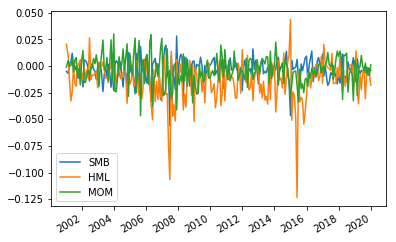

In [223]:
reg_dfs[0][0].iloc[:,2:5].plot()
plt.savefig('factor.svg',format='svg')
print(reg_dfs[0][0].iloc[:,1:5])

In [179]:
reg_dfs[cc][i][['RTRF']].tail()

,RTRF
2019-08-30,-0.081440
2019-09-30,0.000000
2019-10-31,-0.065996
2019-11-29,-0.071064
2019-12-31,0.051941


# 三因子回归

In [189]:
# 按市值和市帐比分组,作25次回归
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
cofs=[[],[],[]]
pvs=[[],[],[]]
r2s=[[],[],[]]
a=np.zeros(25)   #a项
b=np.zeros(25)   #市场因子项系数
c=np.zeros(25)   #规模因子项系数
d=np.zeros(25)   #账面价值比项系数
e=np.zeros(25)   #残差项
R2=np.zeros(25)   #R2相关系数平方

ap=np.zeros(25)  #a显著性检验的P值，下面类同
bp=np.zeros(25)
cp=np.zeros(25)  #c显著性检验的P值，下面类同
dp=np.zeros(25)

for i in range(25):
#     if not i==24:
#         continue
    X=np.array(reg_dfs[0][i][['RMRF','SMB','HML']]).T
    y=np.array(reg_dfs[0][i][['RTRF']]).T
    X=np.mat(X).T
    y=np.mat(y).T

    X = sm.add_constant(X,has_constant='skip')
    model = sm.OLS(y, X)
    results = model.fit()
#     print(results.summary())
    a[i] = results.params[0]
    b[i] = results.params[1]
    c[i] = results.params[2]
    d[i] = results.params[3]

    ap[i]=results.pvalues[0]
    bp[i]=results.pvalues[1]
    cp[i]=results.pvalues[2]
    dp[i]=results.pvalues[3]

    R2[i] = results.rsquared
cofs[0]=[a,b,c,d,e]
pvs[0]=[ap,bp,cp,dp,ep]
r2s[0]=R2

In [190]:
fac1='size'
fac2='BE/ME'
R2inf3=pd.DataFrame(r2s[0].reshape(5,5))
R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
# R2inf3.to_csv('./Out_File/buf.csv')
R2inf3

,small_BE/ME,1,2,3,big_BE/ME
small_size,0.946216,0.956922,0.944210,0.949444,0.948073
1,0.876814,0.892460,0.921194,0.936816,0.938817
2,0.867393,0.892776,0.898467,0.930528,0.944278
3,0.857135,0.879102,0.903737,0.922310,0.939289
big_size,0.860492,0.917978,0.913033,0.933590,0.937372


In [204]:
for i in range(4):
    
    fac1='size'
    fac2='BE/ME'
#     R2inf3=pd.DataFrame(cofs[0][i].reshape(5,5))
#     R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
#     R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
#     print(R2inf3)
    
    R2inf3=pd.DataFrame(pvs[0][i].reshape(5,5))
    R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
    R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
    # R2inf3.to_csv('./Out_File/buf.csv')
    print(R2inf3)


             small_BE/ME             1         2             3     big_BE/ME
small_size  8.089156e-05  2.817844e-05  0.003474  4.752737e-02  1.017853e-01
1           7.544154e-09  3.572063e-07  0.000006  1.614145e-07  1.122172e-04
2           1.007943e-05  6.009033e-07  0.000222  4.725723e-09  8.913052e-06
3           3.242380e-04  3.285098e-04  0.000040  3.455908e-07  8.372520e-08
big_size    7.410029e-04  2.317839e-07  0.000005  1.778325e-05  6.200676e-07
              small_BE/ME              1              2              3  \
small_size  1.244221e-127  6.086021e-142  2.098740e-130  1.840776e-135   
1            2.578330e-93  2.350781e-102  4.490072e-118  2.987141e-128   
2            3.050895e-92  3.913335e-105  5.791096e-109  7.912590e-127   
3            2.613206e-90  6.656444e-101  5.850753e-114  6.067996e-124   
big_size     8.342581e-93  5.447078e-123  9.847163e-121  3.288425e-133   

                big_BE/ME  
small_size  4.589051e-133  
1           1.375628e-129  
2        

,small_BE/ME,1,2,3,big_BE/ME
small_size,1.244221e-127,6.086021e-142,2.098740e-130,1.840776e-135,4.589051e-133
1,2.578330e-93,2.350781e-102,4.490072e-118,2.987141e-128,1.375628e-129
2,3.050895e-92,3.913335e-105,5.791096e-109,7.912590e-127,4.341363e-137
3,2.613206e-90,6.656444e-101,5.850753e-114,6.067996e-124,3.144532e-134
big_size,8.342581e-93,5.447078e-123,9.847163e-121,3.288425e-133,6.061602e-134


# 加入动量因子回归

# 单因子

In [214]:
# 按市值和市帐比分组,作25次回归
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
cofs=[[],[],[]]
pvs=[[],[],[]]
r2s=[[],[],[]]
for cc in range(3):
    a=np.zeros(25)   #a项
    b=np.zeros(25)   #市场因子项系数

    R2=np.zeros(25)   #R2相关系数平方

    ap=np.zeros(25)  #a显著性检验的P值，下面类同
    bp=np.zeros(25)


    for i in range(25):
        X=np.array(reg_dfs[cc][i][['RMRF']]).T
        y=np.array(reg_dfs[cc][i][['RTRF']]).T
        # print(X)
        X=np.mat(X).T
        y=np.mat(y).T
        X = sm.add_constant(X,has_constant='skip')
        model = sm.OLS(y, X)
        results = model.fit()
        a[i] = results.params[0]
        b[i] = results.params[1]


        ap[i]=results.pvalues[0]
        bp[i]=results.pvalues[1]

        R2[i] = results.rsquared
    cofs[cc]=[a,b]
    pvs[cc]=[ap,bp]
    r2s[cc]=R2

In [215]:
fac1='size'
fac2='BE/ME'
R2inf3=pd.DataFrame(r2s[0].reshape(5,5))
R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
# R2inf3.to_csv('./Out_File/buf.csv')
R2inf3

,small_BE/ME,1,2,3,big_BE/ME
small_size,0.715276,0.774857,0.775231,0.783145,0.763540
1,0.728727,0.781830,0.819802,0.823261,0.818728
2,0.750796,0.822592,0.846355,0.864241,0.865958
3,0.760512,0.829662,0.886366,0.893146,0.873708
big_size,0.764807,0.903746,0.906414,0.918808,0.875496


In [205]:
# 按市值和市帐比分组,作25次回归
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
cofs=[[],[],[]]
pvs=[[],[],[]]
r2s=[[],[],[]]
for cc in range(3):
    a=np.zeros(25)   #a项
    b=np.zeros(25)   #市场因子项系数
    c=np.zeros(25)   #规模因子项系数
    d=np.zeros(25)   #账面价值比项系数
    e=np.zeros(25)   #动量指标系数
    e=np.zeros(25)   #残差项
    R2=np.zeros(25)   #R2相关系数平方

    ap=np.zeros(25)  #a显著性检验的P值，下面类同
    bp=np.zeros(25)
    cp=np.zeros(25)  #c显著性检验的P值，下面类同
    dp=np.zeros(25)
    ep=np.zeros(25)

    for i in range(25):
        X=np.array(reg_dfs[cc][i][['RMRF','SMB','HML','MOM']]).T
        y=np.array(reg_dfs[cc][i][['RTRF']]).T
        # print(X)
        X=np.mat(X).T
        y=np.mat(y).T
        X = sm.add_constant(X,has_constant='skip')
        model = sm.OLS(y, X)
        results = model.fit()
        a[i] = results.params[0]
        b[i] = results.params[1]
        c[i] = results.params[2]
        d[i] = results.params[3]
        e[i] = results.params[4]

        ap[i]=results.pvalues[0]
        bp[i]=results.pvalues[1]
        cp[i]=results.pvalues[2]
        dp[i]=results.pvalues[3]
        ep[i]=results.pvalues[4]

        R2[i] = results.rsquared
    cofs[cc]=[a,b,c,d,e]
    pvs[cc]=[ap,bp,cp,dp,ep]
    r2s[cc]=R2

# 回归结果分析

In [211]:
for i in range(5):
    
    fac1='size'
    fac2='BE/ME'
    R2inf3=pd.DataFrame(cofs[0][i].reshape(5,5))
    R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
    R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
    print(R2inf3)
    
#     R2inf3=pd.DataFrame(pvs[0][i].reshape(5,5))
#     R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
#     R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
#     # R2inf3.to_csv('./Out_File/buf.csv')
#     print(R2inf3)

            small_BE/ME         1         2         3  big_BE/ME
small_size     0.005138  0.004501  0.006332  0.001267   0.001699
1              0.015885  0.011477  0.009561  0.011112   0.006049
2              0.009891  0.013041  0.006184  0.010706   0.006642
3              0.008666  0.010336  0.009496  0.011285   0.007914
big_size       0.012555  0.010749  0.007827  0.005321   0.006611
            small_BE/ME         1         2         3  big_BE/ME
small_size     0.972869  1.048571  1.071227  1.016666   1.007718
1              1.028404  1.050748  1.089997  1.061350   1.052419
2              1.069657  1.089567  1.060036  1.085830   1.038863
3              1.002609  1.041617  1.063468  1.085271   1.044229
big_size       1.060628  1.049151  0.991348  1.016861   1.006411
            small_BE/ME         1         2         3  big_BE/ME
small_size     4.351772  4.004081  4.176136  3.704951   3.922225
1              3.188737  2.973925  3.021368  3.129583   2.930260
2              1.659533  

In [207]:
fac1='size'
fac2='BE/ME'
R2inf3=pd.DataFrame(r2s[0].reshape(5,5))
R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
print(R2inf3)

            small_BE/ME         1         2         3  big_BE/ME
small_size     0.948316  0.959578  0.944210  0.951027   0.948628
1              0.879223  0.895904  0.922214  0.936944   0.940161
2              0.873405  0.893697  0.902488  0.933026   0.945565
3              0.859526  0.879137  0.904186  0.922597   0.942193
big_size       0.860909  0.918623  0.915238  0.937068   0.940823


In [208]:
fac1='size'
fac2='MOM'
R2inf3=pd.DataFrame(r2s[1].reshape(5,5))
R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
R2inf3

,small_MOM,1,2,3,big_MOM
small_size,0.949785,0.959556,0.951041,0.924851,0.763017
1,0.930756,0.890477,0.920220,0.928855,0.865112
2,0.924457,0.914720,0.900626,0.915453,0.885012
3,0.897622,0.910201,0.899196,0.905707,0.892306
big_size,0.818935,0.913455,0.906679,0.926007,0.895376


In [209]:
fac1='BE/ME'
fac2='MOM'
R2inf3=pd.DataFrame(r2s[2].reshape(5,5))
R2inf3.columns=['small_{}'.format(fac2),'1','2','3','big_{}'.format(fac2)]
R2inf3.index=['small_{}'.format(fac1),'1','2','3','big_{}'.format(fac1)]
R2inf3

,small_MOM,1,2,3,big_MOM
small_BE/ME,0.789820,0.894664,0.872202,0.907076,0.908770
1,0.924094,0.912329,0.907665,0.918100,0.914980
2,0.929558,0.919863,0.924538,0.918509,0.909611
3,0.938397,0.927336,0.945771,0.936087,0.876434
big_BE/ME,0.941622,0.952531,0.945609,0.927824,0.846568


回归的a值：
            small_BE/ME         1         2         3  big_BE/ME
small_size     0.008205  0.008053  0.006364  0.003893   0.003253
1              0.019297  0.015491  0.011754  0.011860   0.008476
2              0.015406  0.015111  0.010354  0.014019   0.008903
3              0.011856  0.010712  0.010836  0.012372   0.011303
big_size       0.011196  0.012301  0.010542  0.008816   0.010130
回归的a的t检验统计量：
            small_BE/ME         1         2         3  big_BE/ME
small_size     4.015704  4.275952  2.953808  1.992525   1.643003
1              6.007630  5.247422  4.633838  5.410049   3.932258
2              4.518529  5.138947  3.753425  6.095302   4.546888
3              3.651784  3.648221  4.191048  5.254261   5.541864
big_size       3.421161  5.336410  4.695191  4.385820   5.132346


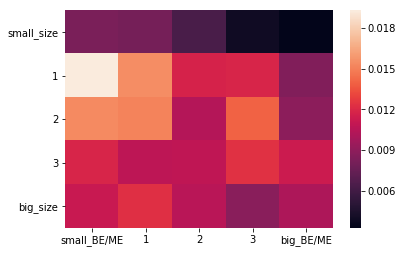

In [71]:
ainf1=pd.DataFrame(a.reshape(5,5))
ainf1.columns=['small_BE/ME','1','2','3','big_BE/ME']
ainf1.index=['small_size','1','2','3','big_size']
tainf1=pd.DataFrame(ta.reshape(5,5))
tainf1.columns=['small_BE/ME','1','2','3','big_BE/ME']
tainf1.index=['small_size','1','2','3','big_size']
print('回归的a值：')
print(ainf1)
#print '自由度为n-p，显著水平5%下的t分位值:'+str(stats.t.isf(0.025,106))
print('回归的a的t检验统计量：')
print(tainf1)
import seaborn as sns
sns.heatmap(ainf1)

In [13]:
# 输出因子系数到文件夹
# reg_df.to_csv('./Out_File/reg.csv')
# df2000=df_need['2000']
# df_need_new=df_need.drop(labels=df2000.index)
# df_need_new
# df_need_new.to_csv('./Out_File/stk.csv',encoding='gbk')